####  Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
#### location.Perform following tasks:
#### 1. Pre-process the dataset.
#### 2. Identify outliers.
#### 3. Check the correlation.
#### 4. Implement linear regression and random forest regression models.
#### Evaluate the models and compare their respective scores like R2, RMSE, etc.

#### Rushikesh Chavan | 41214

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.shape

(200000, 9)

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [9]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [10]:
df1 = df.drop(['Unnamed: 0', 'key'], axis =1)
df1.dropna(axis=0, inplace = True)

In [11]:
df1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [12]:
df1.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int64
day                                int64
month                              int64
year                               int64
dayofweek                          int64
dtype: object

In [13]:
df1.drop(df1[df1['fare_amount']==0].index, inplace=True)
df1.drop(df1[df1['fare_amount']<0].index, inplace=True)

In [14]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000,199977.000000
mean,11.362586,-72.527844,39.935995,-72.526243,39.924410,1.684489,13.491452,15.705071,6.282142,2011.742300,3.048461
std,9.897063,11.437285,7.720462,13.115114,6.793438,1.385972,6.515383,8.687506,3.438932,1.856279,1.946970
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967155,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199977 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199977 non-null  float64            
 1   pickup_datetime    199977 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199977 non-null  float64            
 3   pickup_latitude    199977 non-null  float64            
 4   dropoff_longitude  199977 non-null  float64            
 5   dropoff_latitude   199977 non-null  float64            
 6   passenger_count    199977 non-null  int64              
 7   hour               199977 non-null  int64              
 8   day                199977 non-null  int64              
 9   month              199977 non-null  int64              
 10  year               199977 non-null  int64              
 11  dayofweek          199977 non-null  int64              
dtypes: datetime64[ns, UTC](1), flo

In [16]:
from math import*

In [17]:
## Heversine formula
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [18]:
df1['dist_travel_km'] = distance_transform(df1['pickup_longitude'].to_numpy(),
                                                df1['pickup_latitude'].to_numpy(),
                                                df1['dropoff_longitude'].to_numpy(),
                                                df1['dropoff_latitude'].to_numpy()
                                              )

In [19]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [20]:
df1 = df1.drop('pickup_datetime', axis = 1)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199977 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199977 non-null  float64
 1   pickup_longitude   199977 non-null  float64
 2   pickup_latitude    199977 non-null  float64
 3   dropoff_longitude  199977 non-null  float64
 4   dropoff_latitude   199977 non-null  float64
 5   passenger_count    199977 non-null  int64  
 6   hour               199977 non-null  int64  
 7   day                199977 non-null  int64  
 8   month              199977 non-null  int64  
 9   year               199977 non-null  int64  
 10  dayofweek          199977 non-null  int64  
 11  dist_travel_km     199977 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 19.8 MB


In [22]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,199977.0,11.362586,9.897063,0.010000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199977.0,-72.527844,11.437285,-1340.648410,-73.992065,-73.981823,-73.967155,57.418457
pickup_latitude,199977.0,39.935995,7.720462,-74.015515,40.734795,40.752592,40.767158,1644.421482
dropoff_longitude,199977.0,-72.526243,13.115114,-3356.666300,-73.991407,-73.980093,-73.963659,1153.572603
dropoff_latitude,199977.0,39.924410,6.793438,-881.985513,40.733825,40.753042,40.768001,872.697628
passenger_count,199977.0,1.684489,1.385972,0.000000,1.000000,1.000000,2.000000,208.000000
hour,199977.0,13.491452,6.515383,0.000000,9.000000,14.000000,19.000000,23.000000
day,199977.0,15.705071,8.687506,1.000000,8.000000,16.000000,23.000000,31.000000
month,199977.0,6.282142,3.438932,1.000000,3.000000,6.000000,9.000000,12.000000
year,199977.0,2011.742300,1.856279,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [23]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [24]:
df1.columns[df1.dtypes == 'object']

Index([], dtype='object')

In [25]:
df1.fare_amount.min()

0.01

<AxesSubplot:>

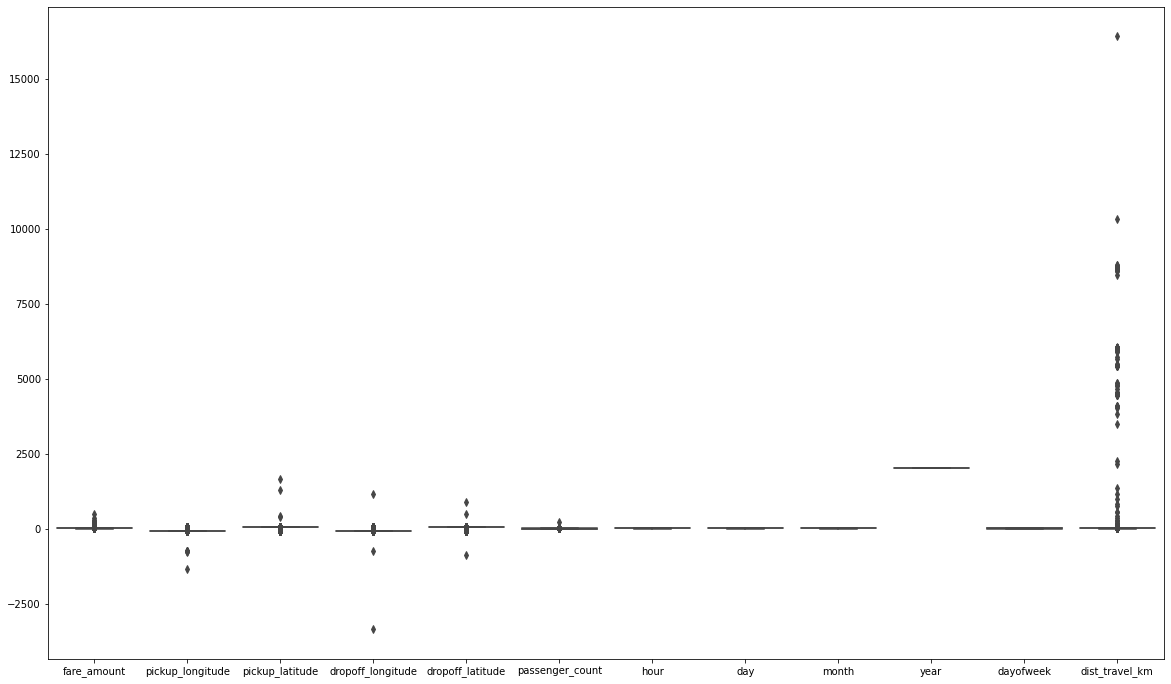

In [26]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df1)

In [27]:
medianFiller = lambda x : x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis = 0)

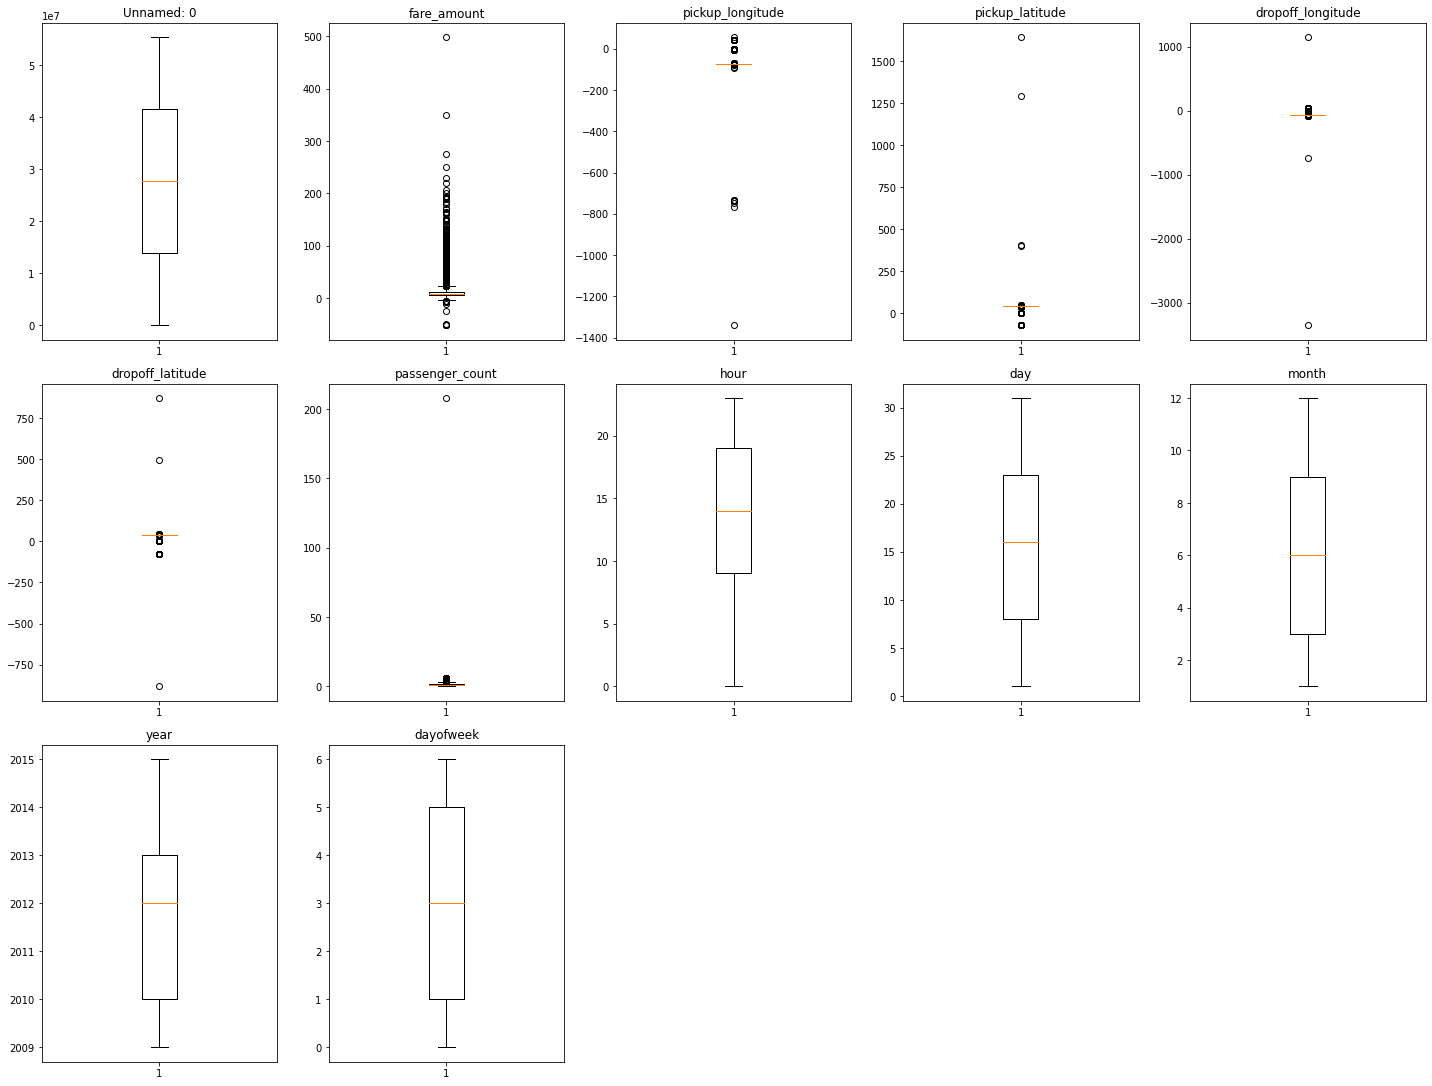

In [28]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [29]:
#We will only keep the observation where fare is between 2.5
df = df.loc[(df.fare_amount >= 0)]

In [30]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [31]:
#df = treat_outliers_all(df , df.iloc[: , 0::])

In [32]:
# plt.figure(figsize=(20,30))
# for i , variable in enumerate(df.iloc[: , 0::]):
#     plt.subplot(6,5,i+1)
#     plt.boxplot(df[variable] , whis = 1.5)
#     plt.tight_layout()
#     plt.title(variable)
# plt.show()

In [33]:
# df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
# print("Remaining observastions in the dataset:", df.shape)

In [34]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [35]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [36]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df.corr()

# print the correlation matrix
corr

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
Unnamed: 0,1.000000,0.000615,0.000231,-0.000342,0.000295,0.000244,0.002254,0.000035,0.000548,0.001307,-0.001323,-0.004608
fare_amount,0.000615,1.000000,0.010432,-0.008460,0.009144,-0.011182,0.010403,-0.021444,0.001328,0.023597,0.118494,0.007398
pickup_longitude,0.000231,0.010432,1.000000,-0.816461,0.833093,-0.846401,-0.000411,0.002434,0.005180,-0.004674,0.009972,0.000823
pickup_latitude,-0.000342,-0.008460,-0.816461,1.000000,-0.774849,0.702430,-0.001563,-0.003823,-0.008260,0.004633,-0.010238,-0.002453
dropoff_longitude,0.000295,0.009144,0.833093,-0.774849,1.000000,-0.916997,-0.000031,0.003456,0.005028,-0.003579,0.008424,0.000044
dropoff_latitude,0.000244,-0.011182,-0.846401,0.702430,-0.916997,1.000000,-0.000592,-0.002521,-0.007807,0.003790,-0.011193,-0.002381
passenger_count,0.002254,0.010403,-0.000411,-0.001563,-0.000031,-0.000592,1.000000,0.013195,0.003236,0.009812,0.004799,0.033214
hour,0.000035,-0.021444,0.002434,-0.003823,0.003456,-0.002521,0.013195,1.000000,0.004683,-0.003906,0.002135,-0.086934
day,0.000548,0.001328,0.005180,-0.008260,0.005028,-0.007807,0.003236,0.004683,1.000000,-0.017382,-0.012133,0.005625
month,0.001307,0.023597,-0.004674,0.004633,-0.003579,0.003790,0.009812,-0.003906,-0.017382,1.000000,-0.115862,-0.008815


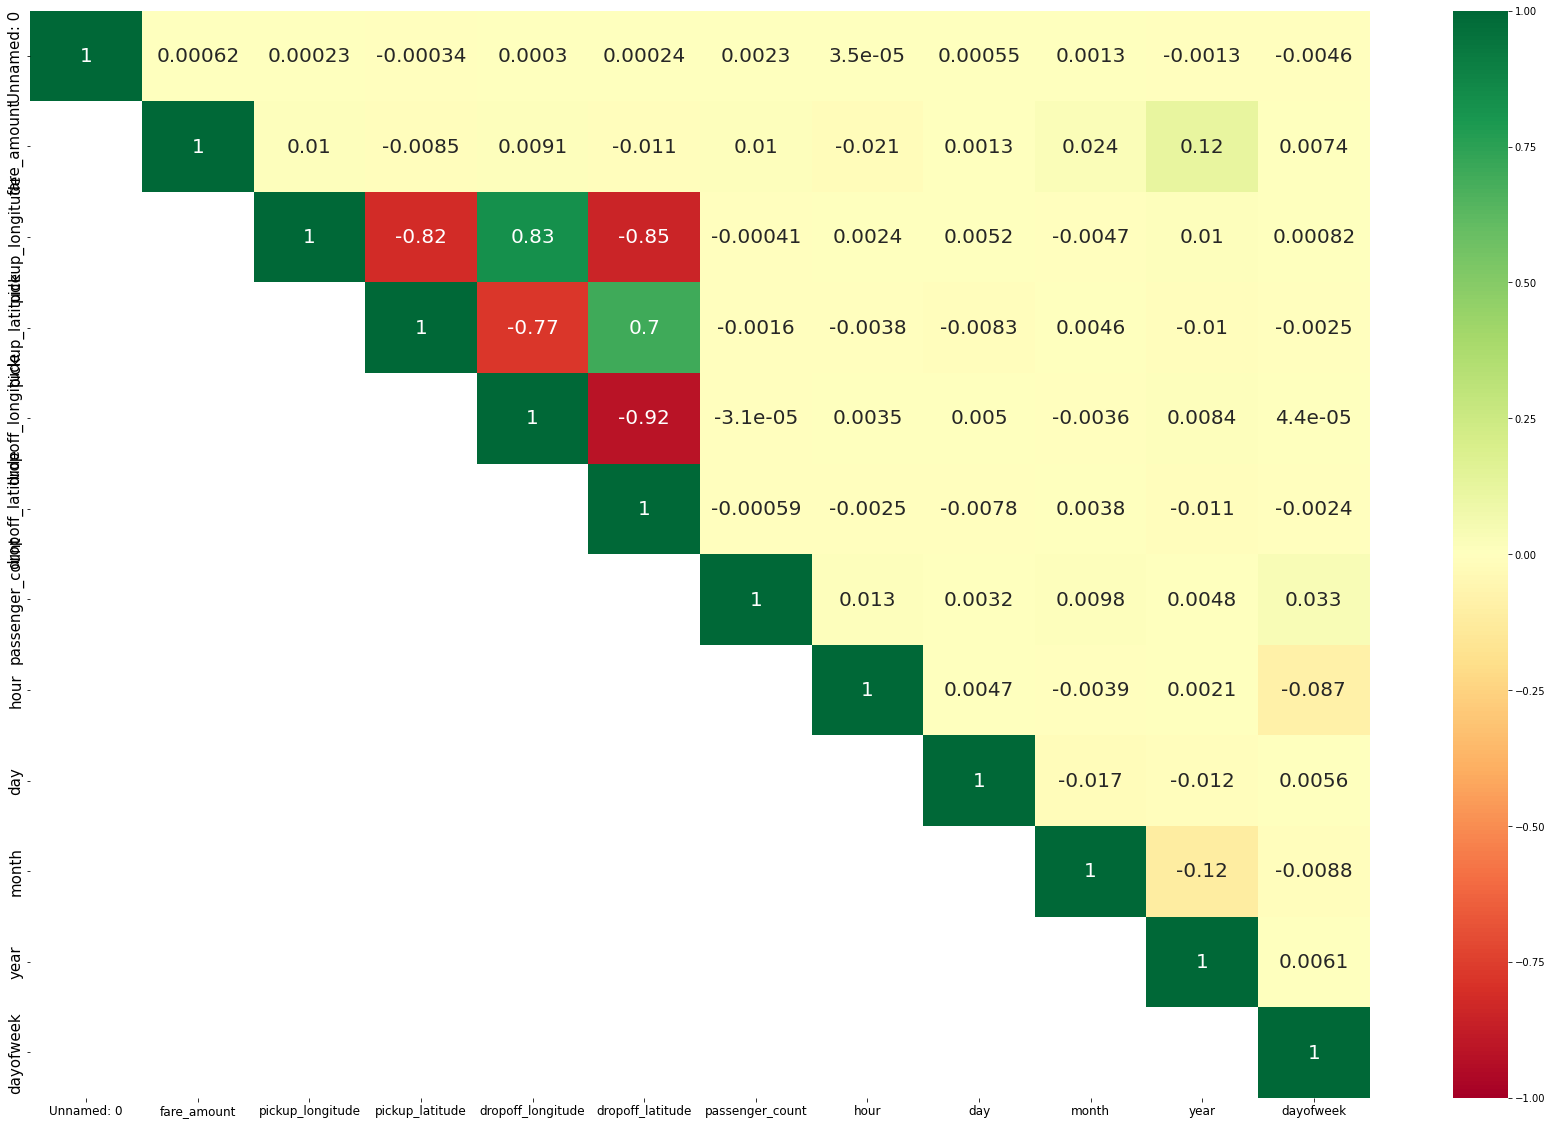

In [37]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

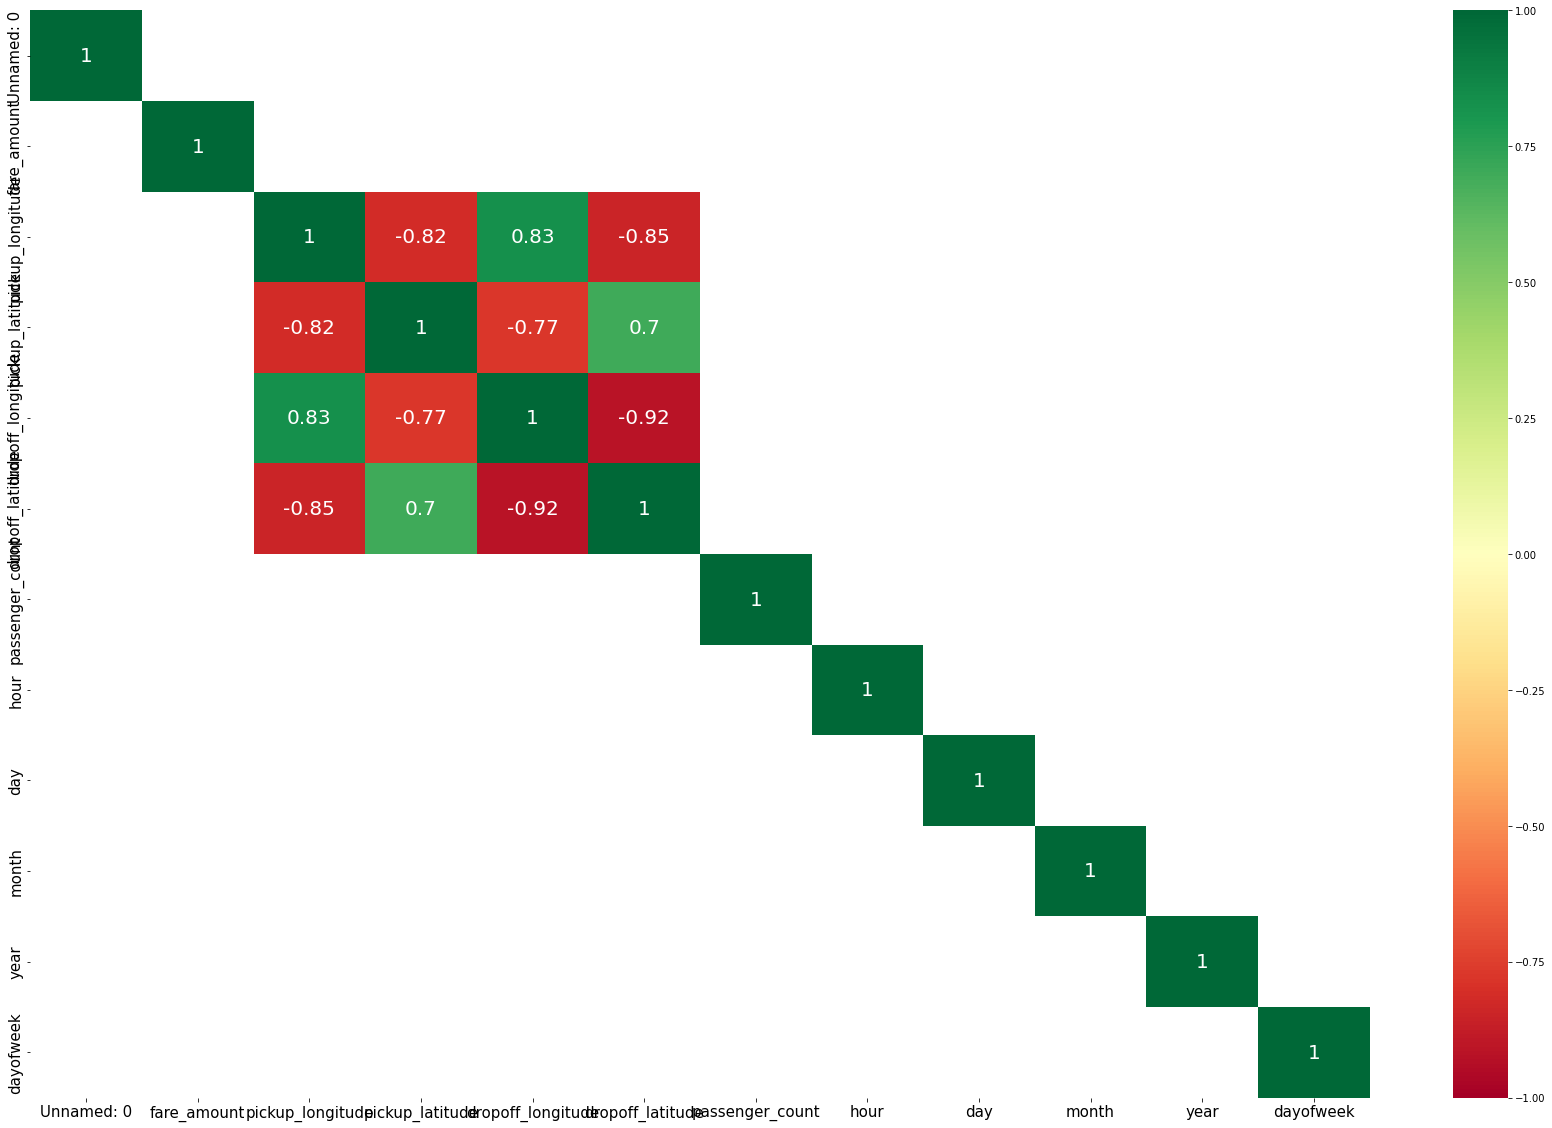

In [38]:
# set figure size
plt.figure(figsize=(30, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

<AxesSubplot:title={'center':'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

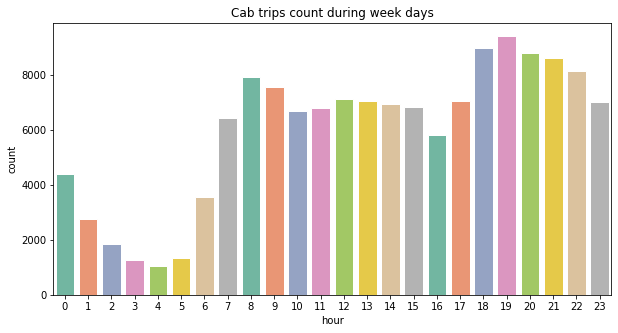

In [39]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')

<AxesSubplot:title={'center':'Cab trips count during week ends'}, xlabel='hour', ylabel='count'>

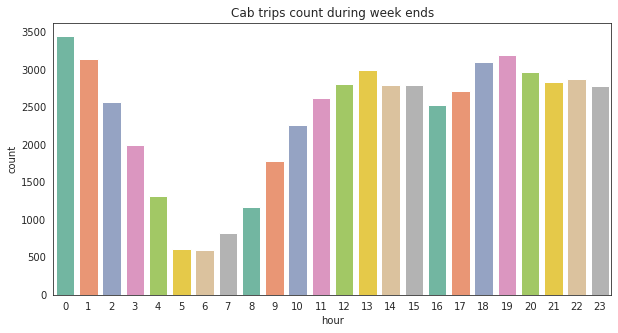

In [40]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week ends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')

In [41]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 

In [42]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df['fare_amount'])

In [43]:
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
x = df.drop('fare_amount',axis = 1)

In [44]:
x.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06.0000003,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [45]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (159986, 13)
The shape of X_test is: (39997, 13)
The shape of y_train is: (159986, 1)
The shape of y_test is: (39997, 1)


In [64]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
# pip install statsmodels
import statsmodels.api as sm
linreg_full = sm.OLS(y_train, x_train).fit()
# print the summary output
print(linreg_full.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen werefare_amount    float64
dtype: object and Unnamed: 0                         int64
key                               object
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int64
day                                int64
month                              int64
year                               int64
dayofweek                          int64
dtype: object. The data was
        fare_amount
184306          6.1
179655          8.9
90508          25.7
167083          8.5
154257          6.5
...             ...
73351          20.0
109266         10.5
50057          12.9
5192           14.0
128045          7.5

[159986 rows x 1 columns]
and
         Unnamed: 0                            key           pickup_datetime  \
184306     3315690  2012-03-21 14:21:00.000000177 2012-03-21 14:21:00+00:00   
179655     9077401    2011-08-21 21:46:34.0000001 2011-08-21 21:46:34+00:00   
90508     30276085    2011-05-11 21:04:03.0000001 2011-05-11 21:04:03+00:00   
167083    18588584    2009-03-11 08:51:37.0000006 2009-03-11 08:51:37+00:00   
154257    37755893    2014-12-11 22:00:25.0000009 2014-12-11 22:00:25+00:00   
...            ...                            ...                       ...   
73351     49602043    2014-10-28 14:21:43.0000004 2014-10-28 14:21:43+00:00   
109266     6636827  2014-07-19 20:24:00.000000153 2014-07-19 20:24:00+00:00   
50057     39371632  2010-08-23 22:09:00.000000158 2010-08-23 22:09:00+00:00   
5192      10514640   2012-11-27 21:28:00.00000038 2012-11-27 21:28:00+00:00   
128045     2402682  2013-04-19 18:06:00.000000231 2013-04-19 18:06:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
184306        -73.973595        40.795400         -73.973595   
179655        -73.993377        40.751947         -73.979839   
90508         -73.982237        40.731665         -73.910114   
167083        -73.969344        40.749535         -73.955319   
154257        -73.963460        40.777004         -73.980053   
...                  ...              ...                ...   
73351         -74.009812        40.703238         -73.978546   
109266        -73.966370        40.799550         -73.940345   
50057         -73.994013        40.724697         -73.994923   
5192          -73.776675        40.645348         -73.819305   
128045        -73.985017        40.778315         -73.993020   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  
184306         40.795400                1    14   21      3  2012          2  
179655         40.732518                1    21   21      8  2011          6  
90508          40.862287                1    21   11      5  2011          2  
167083         40.764885                1     8   11      3  2009          2  
154257         40.785605                1    22   11     12  2014          3  
...                  ...              ...   ...  ...    ...   ...        ...  
73351          40.756911                1    14   28     10  2014          1  
109266         40.807322                2    20   19      7  2014          5  
50057          40.762680                1    22   23      8  2010          0  
5192           40.670327                2    21   27     11  2012          1  
128045         40.746330                1    18   19      4  2013          4  

[159986 rows x 13 columns]
before. After,
[[ 6.1]
 [ 8.9]
 [25.7]
 ...
 [12.9]
 [14. ]
 [ 7.5]]
[[3315690 '2012-03-21 14:21:00.000000177'
  Timestamp('2012-03-21 14:21:00+0000', tz='UTC') ... 3 2012 2]
 [9077401 '2011-08-21 21:46:34.0000001'
  Timestamp('2011-08-21 21:46:34+0000', tz='UTC') ... 8 2011 6]
 [30276085 '2011-05-11 21:04:03.0000001'
  Timestamp('2011-05-11 21:04:03+0000', tz='UTC') ... 5 2011 2]
 ...
 [39371632 '2010-08-23 22:09:00.000000158'
  Timestamp('2010-08-23 22:09:00+0000', tz='UTC') ... 8 2010 0]
 [10514640 '2012-11-27 21:28:00.00000038'
  Timestamp('2012-11-27 21:28:00+0000', tz='UTC') ... 11 2012 1]
 [2402682 '2013-04-19 18:06:00.000000231'
  Timestamp('2013-04-19 18:06:00+0000', tz='UTC') ... 4 2013 4]].

In [ ]:
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions

In [ ]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [ ]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linreg full model ",
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared,
                     'Adj. R-Squared': linreg_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

### Linear Regression 

In [ ]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(x)

In [ ]:
x1= scaler.fit_transform(x)
x1

In [ ]:
y1=y

In [ ]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",x1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",x1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

In [ ]:
# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000) #Instantiation

# fit the model
SGD_model.fit(x1_train, y1_train) #Training

In [ ]:
# predict the values
y1_pred_SGD  = SGD_model.predict(x1_test)
y1_pred_SGD

In [ ]:
r_squared_SGD = SGD_model.score(x1_train,y1_train)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))

In [ ]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear regression with SGD",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

In [ ]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [ ]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)

In [ ]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)

In [ ]:
y_pred_RF

In [ ]:
r_squared_RF = rf_reg.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
Adj_r_squared_RF
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [ ]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

In [ ]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation